# 쇼핑몰 고객 주문 데이터 파악하기 

- 현재 상황 파악
- 모델수립 혹은 목표 설정 

- 데이터 셋 
    - 온라인 리테일 사이드의 2010/12 - 2011/12 간의 주문기록 데이터
    - 50만건의 데이터

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
# 시각
import matplotlib.pyplot as plt
%matplotlib inline

#
import missingno as msno

# 워닝 방지
# ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
df_retail = pd.read_csv('./input/OnlineRetail.csv')

In [3]:
df_retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [4]:
df_retail.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

## 컬럼 정보 

- 컬럼(columns)속성 
    - InvoiceNo: 주문 번호 
    - StockCode: 아이템 아이디 
    - Description: 상품 설명 
    - Quantity: 상품 주문 수량 
    - InvoiceDate: 주문 시각 
    - UnitPrice: 개당가격 
    - CustomerID: 고객 아이디
    - Country: 고객 거주지역(국가)

In [5]:
df_retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


# Data Cleansing

- null 데이터 cjfl 
- CustomerID
- 음수의 아이템 수량 
- 가격이 0원 

In [6]:
df_retail.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [7]:
for col in df_retail.columns:
    percent = df_retail[col].isnull().sum() / df_retail[col].shape[0]
    msg = 'column: {:>10}\t Percent of NaN value: {:.2f}%'.format(col, 100 * (percent))
    print(msg)

column:  InvoiceNo	 Percent of NaN value: 0.00%
column:  StockCode	 Percent of NaN value: 0.00%
column: Description	 Percent of NaN value: 0.27%
column:   Quantity	 Percent of NaN value: 0.00%
column: InvoiceDate	 Percent of NaN value: 0.00%
column:  UnitPrice	 Percent of NaN value: 0.00%
column: CustomerID	 Percent of NaN value: 24.93%
column:    Country	 Percent of NaN value: 0.00%


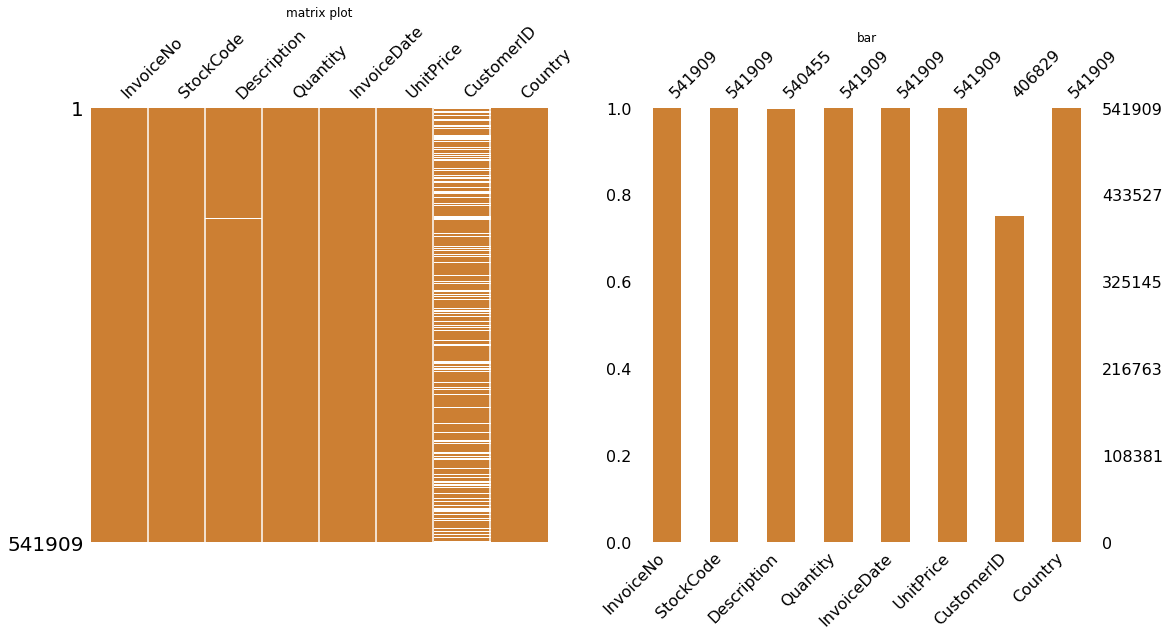

In [8]:
# 널값 체크 
f, ax = plt.subplots(1, 2, figsize = (18,8))

# 1번 : pieplot
msno.matrix(df = df_retail.iloc[:,:],figsize=(8,8), color = (0.8,0.5,0.2),ax=ax[0])
ax[0].set_title('matrix plot')

# 2번 : countplot
msno.bar(df = df_retail.iloc[:,:], figsize=(8,8), color=(0.8, 0.5, 0.2),ax=ax[1])
ax[1].set_title('bar')

plt.show()

In [9]:
df_retail.shape

(541909, 8)

In [10]:
tmp = pd.notnull(df_retail['CustomerID'])
tmp

0         True
1         True
2         True
3         True
4         True
          ... 
541904    True
541905    True
541906    True
541907    True
541908    True
Name: CustomerID, Length: 541909, dtype: bool

In [11]:
test = df_retail[pd.notnull(df_retail['CustomerID'])]
test

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [12]:
df_retail= df_retail[pd.notnull(df_retail['CustomerID'])]
len(df_retail)

406829

In [13]:
df_retail.shape

(406829, 8)

In [14]:
# 비지니스 로직에 맞지 않는 데이터를 제거 
# 수량, 가격 > 0 
df_retail = df_retail[df_retail['Quantity']> 0]
df_retail = df_retail[df_retail['UnitPrice']> 0]

In [15]:
len(df_retail)

397884

In [16]:
df_retail.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397884 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    397884 non-null  object 
 1   StockCode    397884 non-null  object 
 2   Description  397884 non-null  object 
 3   Quantity     397884 non-null  int64  
 4   InvoiceDate  397884 non-null  object 
 5   UnitPrice    397884 non-null  float64
 6   CustomerID   397884 non-null  float64
 7   Country      397884 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.3+ MB


In [17]:
# 데이터 타입 변경 -> (메모리 효율화 / 올바른 데이터 타입 변경 매칭) 
df_retail['CustomerID'] = df_retail['CustomerID'].astype(np.int32)
df_retail.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397884 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    397884 non-null  object 
 1   StockCode    397884 non-null  object 
 2   Description  397884 non-null  object 
 3   Quantity     397884 non-null  int64  
 4   InvoiceDate  397884 non-null  object 
 5   UnitPrice    397884 non-null  float64
 6   CustomerID   397884 non-null  int32  
 7   Country      397884 non-null  object 
dtypes: float64(1), int32(1), int64(1), object(5)
memory usage: 25.8+ MB


In [18]:
# 고객 주문 총 금액 
df_retail['CheckoutPrice'] = df_retail['UnitPrice']*df_retail['Quantity']
df_retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,CheckoutPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850,United Kingdom,20.34


## 데이터 csv에 저장 

In [19]:
df_retail.to_csv('./output/OnlineRetailClean.csv')